In [1]:
from IPython.display import Image

# 공간자료 시각화

## 공간데이터

1. 공간 자료(공간 데이터)란 각 관측치마다 공간에 대한 정보를 가지고 있는 데이터이며, 공간 정보(위치 정보)는 위도(lattitude)와 경도(longitude)로 표현한다.

2. 위경도는 지리 좌표계(Geographic coordinate system)을 기반으로 생성된다. ex) TM 좌표계(EPSG:2097), WGS84좌표계(EPSG:4326), UTM-K좌표계(EPSG:5179)등이 존재한다.

![위경도](./long_lat_image.jpeg)

3. 같은 위경도 좌표더라도 각 좌표계에 따라 다른 값을 가진다. 그러므로 공간데이터를 다루는데 있어 가장 중요한 것이 이 좌표계이다.

4. 예를들어, 서울 롯데타워의 위치의 좌표는 각 좌표계에 따라 다음과 같이 나타난다.
    1) 위도 : 37.67777777777778 N, 경도 : 127.09805555555555 E
    2) TM좌표계 : (565937.9846, 32211.3849)
    3) UTM-K좌표계 : (1964325.7452, 964556.428)
    
5. 공간 정보는 지도에 위치를 표현할때, 기본적으로 점(point)로 표현을 한다. 또한 이 점들을 연결하여 선(line), 이 선들을 연결한 다각형(polygon)형태로 저장된다. 이 개념은 다음의 그림으로 표현할 수 있다. 

![기본](./basic_element.png)

파이썬에서는 이런 공간데이터를 다루기 위해 geopandas 패키지가 구현되어 있고, 좌표계를 다루기 위해 pyproj 패키지가 구현되어 있다.

## 사용할 패키지 불러오기

In [2]:
import pandas as pd
import geopandas as gpd
import pyproj
from pyproj import crs
import matplotlib.pyplot as plt

## 좌표계가 포함된 데이터 읽기

화재출동 현황 데이터를 이용하여 좌표를 입력하고, 이를 지도에 표현해 보자.

In [7]:
fire_dat = pd.read_csv("https://uos-bigdata.github.io/lab_data/docs/assets/data_lab_fire/fire.csv")
fire_dat.columns

Index(['wrinvstg_no', 'fire_type_nm', 'buld_srtfrm', 'buld_strctr',
       'buld_srtrf', 'buld_strct_dong_cnt', 'ground_nof', 'bstory_cnt',
       'totar', 'bottom_area', 'buld_sttus_nm', 'dth_cnt', 'injpsn_cnt',
       'dth_hnl_dmge_cnt', 'prprty_dmge_amt', 'fire_ocrn_yr', 'season_se_nm',
       'qtr_se', 'fire_ocrn_ymd', 'fire_ocrn_tm', 'fire_ocrn_mnth',
       'fire_ocrn_day', 'fire_ocrn_hour', 'fire_ocrn_min', 'daywk', 'frstt_nm',
       'ward_nm', 'lfdau_nm', 'dsp_reqre_time', 'fire_supesn_time', 'sido_nm',
       'sigungu_nm', 'emd_nm', 'cty_frmvl_se_nm', 'emd_se_nm', 'gis_x_axis',
       'gis_y_axis', 'longitude', 'la', 'spt_frstt_dist',
       'spt_safe_cnter_dist', 'spt_lfdau_dist', 'ign_htsrc_nm',
       'ign_htsrc_sclas_nm', 'ign_fctr_lclas_nm', 'ign_fctr_sclas_nm',
       'frst_igobj_lclas_nm', 'frst_igobj_sclas_nm', 'ign_mhrls_lclas_nm',
       'ign_mhrls_sclas_nm', 'cmbs_expobj_lclas_nm', 'cmbs_expobj_sclas_nm',
       'fclty_place_lclas_nm', 'fclty_place_mclas_nm', 'fclt

화재출동 현황 데이터를 보면, `longitude`변수, `la`변수가 각각 경도, 위도를 의미하는 변수이다.

In [4]:
fire_dat.crs

AttributeError: 'DataFrame' object has no attribute 'crs'

데이터를 읽었을때, 데이터에 좌표계가 존재하지 않기 때문에 crs(Coordinate Reference System)함수가 에러를 나타낸다. 하지만, 좌표계가 있는데 왜 이런 에러를 발생시킬까??

데이터에 저장되있는 좌표는 컴퓨터 기준에서 단순 숫자에 지나지 않는다. 즉, `fire_dat`데이터 프레임에 저장된 `la`변수에 저장된 값 37.552875는 그냥 숫자일 뿐 좌표가 아니다. 그러므로, 이 숫자가 좌표라는 것을 입력해줘야 한다.

화재출동 현황 데이터에 있는 변수 `longitude`와 `la`는 EPSG:4326 좌표계를 의미한다.. 그러므로 변수들 `la`(위도), `longitude`(경도)를 좌표계로 지정해 준다.

In [8]:
fire_dat = gpd.GeoDataFrame(fire_dat, geometry = gpd.points_from_xy(fire_dat['longitude'], fire_dat['la']), crs='EPSG:4326')

In [9]:
fire_dat.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

`geopandas` 패키지에 `GeoDataFrame`함수를 이용하여 geometry 정보를 입력하는 방법이다. 위 데이터에서는 위도는 `la`, 경도는 `longitude`으로 입력하고, crs함수를 이용해 확인하였다.

이제 위경도를 입력한 데이터에 전국 법정동 좌표를 가져와 데이터를 합쳐서 그림을 표현하자.

## 전국 법정동 좌표 정보 데이터

예시로 사용하기위한 서울특별시 법정동 좌표 데이터는 shp파일로 저장되어 있다.

- shp 파일 : csv, xlsx과 다르게 위치 정보(geometry)를 포함하고 있는 파일로, 확장자가 dbf, prj, shp, shx 4가지 파일이 모두 있어야 사용 가능하다. (prj는 없어도 가능, 이유는 prj파일이 좌표계 정보를 가지고 있는 파일이기 때문이다.) 

In [17]:
seoul_map = gpd.read_file("https://uos-bigdata.github.io/lab_data/docs/assets/data_lab_fire/seoul_shp.shp")

seoul_map 데이터의 정보는 다음과 같다.

In [19]:
seoul_map.info()
seoul_map

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fid         467 non-null    float64 
 1   bjd_code    467 non-null    float64 
 2   shape_area  467 non-null    float64 
 3   sido        467 non-null    object  
 4   si          467 non-null    object  
 5   sgg         467 non-null    object  
 6   bjd         467 non-null    object  
 7   geometry    467 non-null    geometry
dtypes: float64(3), geometry(1), object(4)
memory usage: 29.3+ KB


,fid,bjd_code,shape_area,sido,si,sgg,bjd,geometry
0,1.0,1.111010e+09,7.926179e+05,서울특별시,종로구,종로구,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,2.0,1.111010e+09,9.882172e+04,서울특별시,종로구,종로구,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,3.0,1.111010e+09,7.327165e+04,서울특별시,종로구,종로구,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,4.0,1.111010e+09,5.940365e+04,서울특별시,종로구,종로구,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,5.0,1.111010e+09,5.939929e+04,서울특별시,종로구,종로구,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."
...,...,...,...,...,...,...,...,...
462,463.0,1.174011e+09,4.690167e+06,서울특별시,강동구,강동구,암사동,"POLYGON ((968514.203 1950677.234, 968505.336 1..."
463,464.0,1.174011e+09,3.057341e+06,서울특별시,강동구,강동구,천호동,"POLYGON ((968336.280 1950222.697, 968337.437 1..."
464,465.0,1.174011e+09,1.956188e+06,서울특별시,강동구,강동구,성내동,"POLYGON ((967686.073 1948534.011, 967685.029 1..."
465,466.0,1.174010e+09,1.611551e+06,서울특별시,강동구,강동구,길동,"POLYGON ((969147.362 1949613.535, 969164.491 1..."


## 지도에 화재 사고 표시

이제, 화재출동 현황데이터를 법정동 지도 위에 나타내보자. 우선 서울 전체가 아닌 중구에 대해서만 추출하여 표현해보자.

법정동 지도 데이터 및 화재출동 현황자료에서 중구만 뽑는다.

In [20]:
tmp_ind = fire_dat["sigungu_nm"] == "은평구"
jg_fire_dat = fire_dat.loc[tmp_ind, :]

jg_fire_dat.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
tmp_ind = seoul_map["sgg"] == "은평구"
jg_map_dat = seoul_map.loc[tmp_ind, :]

jg_map_dat.crs

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

하지만, 두 데이터의 좌표계는 서로 다름을 확인 할 수 있다. 이는 맨 처음 설명했듯이, 위치는 같은 곳을 의미하지만, 다른 지도에서의 좌표를 의미한다. 그러므로 이 둘의 좌표계를 맞춘다. 

이를 위해 jg_fire_dat의 좌표계를 "EPSG:5179"좌표계로 맞춘다.

In [23]:
jg_fire_dat = jg_fire_dat.to_crs(5179)

jg_fire_dat.crs

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

좌표가 "EPSG:5179"로 맞춰진것을 알 수 있다. 따라서, 이를 그림으로 그리면 다음과 같다.

<Axes: >

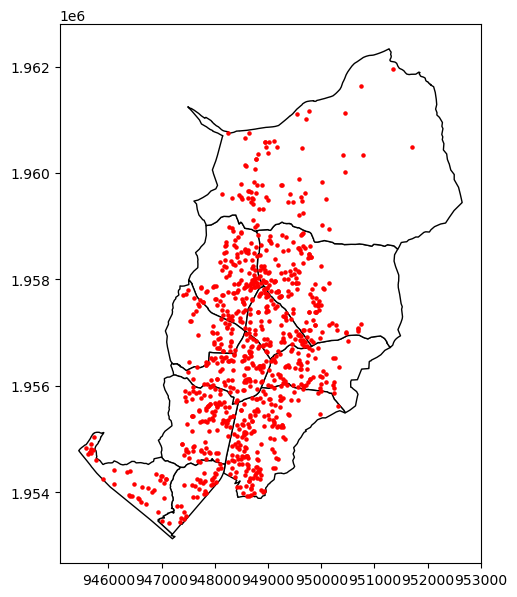

In [24]:
fig, ax = plt.subplots(figsize = (7, 7))
jg_map_dat.plot(ax = ax, linewidth = 1, edgecolor = 'black', facecolor = "white")
jg_fire_dat.plot(ax = ax, color = 'red', markersize = 5)

즉, 위 그림은 서울특별시 은평구에 법정동 단위로 2017년부터 2021년까지 화재가 발생한 위치를 나타낸 지도이다. 이를 2021년에 대해 서울 전역으로 살펴보자.

<Axes: >

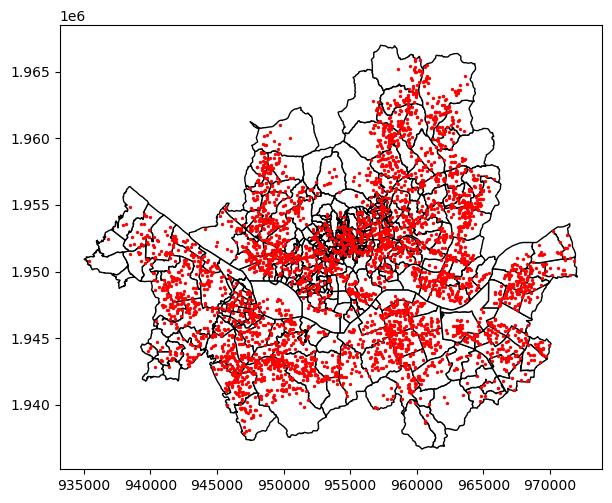

In [26]:
fire_dat = fire_dat.to_crs(5179)

tmp_ind = fire_dat["fire_ocrn_yr"] == 2021
sub_fire_dat = fire_dat.loc[tmp_ind, :]

fig, ax = plt.subplots(figsize = (7, 7))
seoul_map.plot(ax = ax, linewidth = 1, edgecolor = 'black', facecolor = "white")
sub_fire_dat.plot(ax = ax, color = 'red', markersize = 2)

이 중, 여름과 겨울을 구분하여 점으로 표현하면 다음 그래프로 나타난다.

<Axes: >

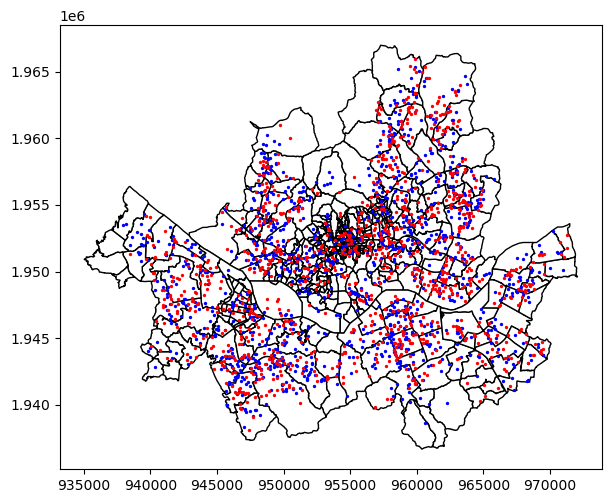

In [28]:
sum_ind = sub_fire_dat["season_se_nm"] == "여름"
sum_fire_dat = sub_fire_dat.loc[sum_ind, :]

win_ind = sub_fire_dat["season_se_nm"] == "겨울"
win_fire_dat = sub_fire_dat.loc[win_ind, :]

fig, ax = plt.subplots(figsize = (7, 7))
seoul_map.plot(ax = ax, linewidth = 1, edgecolor = 'black', facecolor = "white")
win_fire_dat.plot(ax = ax, color = 'blue', markersize = 2)
sum_fire_dat.plot(ax = ax, color = 'red', markersize = 2)

다음으로, 점 그래프가 아닌 그 값에 따른 값을 지도에 채우는 것을 그려보자. 이번 예제는 2021년에 총 출동횟수를 각 법정동별로 나타내보자. 출동한 연도를 나타낸 변수는 `fire_ocrn_yr`이다.

In [43]:
year_ind = fire_dat['fire_ocrn_yr'] == 2021
year_dat = fire_dat.loc[year_ind, :]

In [45]:
year_dat["count"] = 1

C:\Users\hgkang\AppData\Roaming\Python\Python310\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


`groupby`함수와 `agg`함수, `sum`함수를 이용하여 2021년에 법정동에 대해 총 출동횟수를 계산한다.

In [46]:
count_dat = year_dat.groupby(["sido_nm", 'sigungu_nm', "emd_nm"])["count"].agg('sum')
count_dat = count_dat.reset_index()

In [47]:
count_dat

,sido_nm,sigungu_nm,emd_nm,count
0,서울특별시,강남구,개포동,30
1,서울특별시,강남구,논현동,78
2,서울특별시,강남구,대치동,39
3,서울특별시,강남구,도곡동,18
4,서울특별시,강남구,삼성동,42
...,...,...,...,...
389,서울특별시,중랑구,면목동,81
390,서울특별시,중랑구,묵동,23
391,서울특별시,중랑구,상봉동,30
392,서울특별시,중랑구,신내동,18


`merge`함수를 이용하여 두 데이터(법정동 지도 데이터, 법정동별 출동건수 데이터)를 merge하는데, 기준이 되는 변수는 각각 `sido, sgg, bjd`, `sido_nm`, `sigungu_nm`, `emd_nm`이다.

In [49]:
merge_dat = pd.merge(seoul_map, count_dat, left_on = ["sido", "sgg", "bjd"], right_on = ["sido_nm", "sigungu_nm", "emd_nm"])

마지막으로 출동횟수에 대한 변수에 대해 그래프를 생성한다.

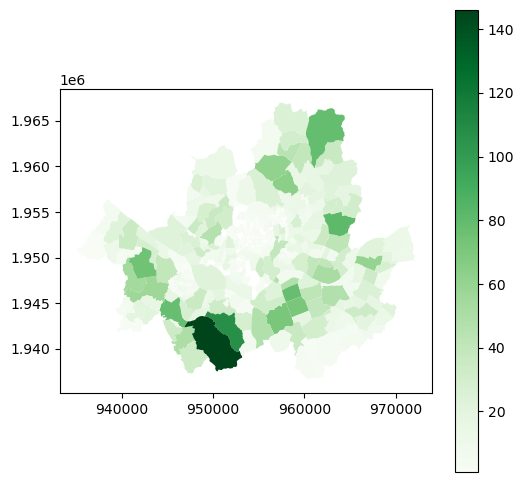

In [50]:
fig, ax = plt.subplots(figsize = (6, 6))
ax = merge_dat.plot(column = 'count', cmap = 'Greens', ax = ax, legend = True)

plt.show()